In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# File is accessed from google drive
file_png_path = '/content/drive/MyDrive/Colab Notebooks/Class notebook/Pengolahan data system fisis/Mid-Exams/20222003.png'
file_wav_path = '/content/drive/MyDrive/Colab Notebooks/Class notebook/Pengolahan data system fisis/Mid-Exams/note_08_20222003.wav'

# Bagian take-home

Info: Gunakan berkas WAV dan PNG sesuai dengan NIM masing-masing. 

url https://github.com/dudung/fi6004-01-2022-2/blob/main/note/08/README.md


## 3. Unduh berkas WAV.
a. Tuliskan ukuran berkas.

b. Tuliskan durasi audio yang tersimpan pada berkas.

c. Tuliskan sample rate berkas audio yang tersimpan pada berkas.

d. Lakukan FFT 1-D untuk dengan rfft dari scipy.fft dan tentukan frekuensi-frekuensinya.

e. Sarikan semua langkah yang dilakukan beserta hasilnya sesuai dengan petunjuk di
https://github.com/dudung/fi6004-01-2022-2/issues/4.

a. File size: 352844 bytes
b. Audio length: 4.0 seconds
c. Sample rate: 44100 Hz

d. FFT results:


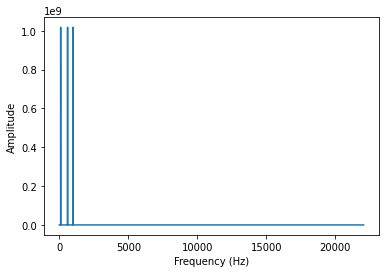

In [17]:
import scipy.io.wavfile as wavfile
from scipy.fft import rfft
import numpy as np
import matplotlib.pyplot as plt
import os

# Get file size in bytes
file_size = os.path.getsize(file_wav_path)
print(f"a. File size: {file_size} bytes")

# Read in WAV file
sample_rate, data = wavfile.read(file_wav_path)

# Calculate length of audio in seconds
audio_length = len(data) / sample_rate
print(f"b. Audio length: {audio_length} seconds")
print(f"c. Sample rate: {sample_rate} Hz")

# Take one-dimensional FFT of data using rfft
fft_data = rfft(data)

# Calculate frequency bins
freq_bins = np.fft.rfftfreq(len(data), d=1/sample_rate)

# Plot the FFT results
plt.plot(freq_bins, np.abs(fft_data))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


print(f"\nd. FFT results:")
plt.show()


## 4. Unduh berkas PGN.

a. Tuliskan ukuran berkas.

b. Tuliskan ukuran citra yang tersimpan dalam berkas.

c. Tuliskan format pixel citra yang tersimpan dalam berkas.

d. Lakukan FFT 2-D dengan ifftshift dan fft2 dari numpy.fft dan tentukan frekuensifrekuensinya.

e. Sarikan semua langkah yang dilakukan beserta hasilnya sesuai dengan petunjuk di
https://github.com/dudung/fi6004-01-2022-2/issues/4.


a. File size: 1804 bytes
b. Image size: (100, 100)
c. Pixel format: RGBA

d. FFT results:


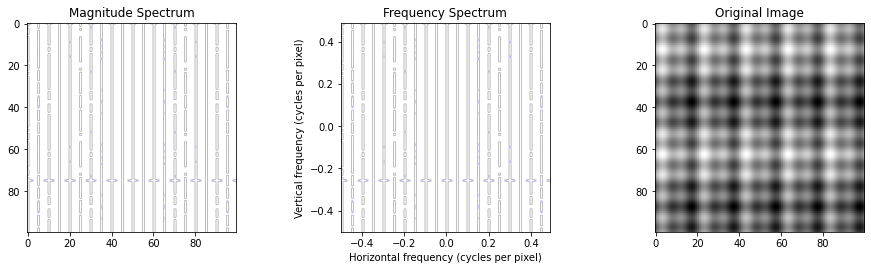

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.image")


# Read in PNG file
im = Image.open(file_png_path)

# Get file size
file_size = os.path.getsize(file_png_path)

# Get image size
im_size = im.size

# Get pixel format
pixel_format = im.mode

# Convert image to numpy array
im_arr = np.array(im)

# Perform 2-D FFT
fft_data = np.fft.fft2(im_arr)
fft_data_shift = np.fft.fftshift(fft_data)

# Determine frequencies
freqs_x = np.fft.fftfreq(im_arr.shape[1])
freqs_y = np.fft.fftfreq(im_arr.shape[0])
freqs_x_shift = np.fft.fftshift(freqs_x)
freqs_y_shift = np.fft.fftshift(freqs_y)

# Print file size, image size, and pixel format
print("\na. File size:", file_size, "bytes")
print("b. Image size:", im_size)
print("c. Pixel format:", pixel_format)
print(f"\nd. FFT results:")

# Plot magnitude spectrum
magnitude_spectrum = np.log(np.abs(fft_data_shift) + 1e-10) # adding small value to avoid division by zero

# Plot frequency spectrum
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(magnitude_spectrum, cmap='gray')
ax1.set_title('Magnitude Spectrum')
ax2.imshow(magnitude_spectrum, extent=(freqs_x_shift.min(), freqs_x_shift.max(), freqs_y_shift.min(), freqs_y_shift.max()), cmap='gray')
ax2.set_xlabel('Horizontal frequency (cycles per pixel)')
ax2.set_ylabel('Vertical frequency (cycles per pixel)')
ax2.set_title('Frequency Spectrum')
ax3.imshow(im, cmap='gray')
ax3.set_title('Original Image')
plt.subplots_adjust(wspace=0.5)
plt.show()


a. File size: 1804 bytes
b. Image size: (100, 100)
c. Pixel format: RGBA

d. FFT Normalized results:


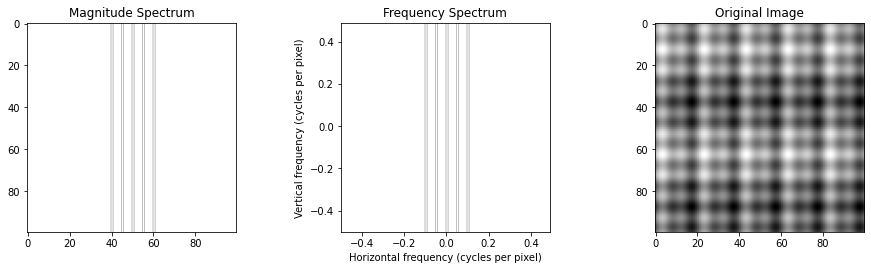

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.image")


# Read in PNG file
im = Image.open(file_png_path)

# Get file size
file_size = os.path.getsize(file_png_path)

# Get image size
im_size = im.size

# Get pixel format
pixel_format = im.mode

# Convert image to numpy array
im_arr = np.array(im)

# Normalize pixel values to [0, 1]
im_norm = im_arr.astype(np.float32) / 255.0

# Perform 2-D FFT
fft_data = np.fft.fft2(im_norm)
fft_data_shift = np.fft.fftshift(fft_data)

# Determine frequencies
freqs_x = np.fft.fftfreq(im_norm.shape[1])
freqs_y = np.fft.fftfreq(im_norm.shape[0])
freqs_x_shift = np.fft.fftshift(freqs_x)
freqs_y_shift = np.fft.fftshift(freqs_y)

# Print file size, image size, and pixel format
print("\na. File size:", file_size, "bytes")
print("b. Image size:", im_size)
print("c. Pixel format:", pixel_format)
print(f"\nd. FFT Normalized results:")

# Plot magnitude spectrum
magnitude_spectrum = np.log(np.abs(fft_data_shift) + 1e-10) # adding small value to avoid division by zero

# Plot frequency spectrum
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(magnitude_spectrum, cmap='gray')
ax1.set_title('Magnitude Spectrum')
ax2.imshow(magnitude_spectrum, extent=(freqs_x_shift.min(), freqs_x_shift.max(), freqs_y_shift.min(), freqs_y_shift.max()), cmap='gray')
ax2.set_xlabel('Horizontal frequency (cycles per pixel)')
ax2.set_ylabel('Vertical frequency (cycles per pixel)')
ax2.set_title('Frequency Spectrum')
ax3.imshow(im, cmap='gray')
ax3.set_title('Original Image')
plt.subplots_adjust(wspace=0.5)
plt.show()